# <center>  World Happiness Report
### Import Data

In [82]:
# Import modules
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set plotting format
plt.rcParams['figure.figsize'] = (30,10)
%config InlineBackend.figure_format = 'retina'

# Import data from dropbox
r15 = pd.read_csv('https://www.dropbox.com/s/we7ee8bkdmykw97/2015.csv?dl=1')
r16 = pd.read_csv('https://www.dropbox.com/s/3tbo0h3zu77bl7e/2016.csv?dl=1')
r17 = pd.read_csv('https://www.dropbox.com/s/tjwljwmksoes95o/2017.csv?dl=1')

# Adding a Year feature to reports for wrangling
r15['Year'] =  '2015'
r16['Year'] =  '2016'
r17['Year'] =  '2017'

# create a list of the reports, for iteration
reports = [r15, r16, r17]
years = ['2015','2016','2017']

### DataFrame Shape

In [83]:
# view the shape of the reports
for r in reports:
    print(r.shape)

(158, 13)
(157, 14)
(155, 13)


Seems like their is an extra feature in one report
### Report Feature

In [84]:
# 2015 report features
r15.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

In [85]:
# 2016 report features
r16.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [86]:
# 2017 report features
r17.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')

The governing body changed there reporting methodology in 2016 and 2017, changing the names of some features  reporting new one.
### View the Two Different Repost

In [87]:
# view 2015 report
r15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [88]:
# view 2016 report
r16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [89]:
# view 2017 report
r17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


<br><br><br><br>
# <center> Cleaning Data
### Feature Engineering Upper and Lower Confindence Intreval for 2015 Report

In [90]:
# view 2016 report
r16.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [91]:
# creating and upper and lower confidence interval scores
r15['Lower Confidence Interval'] = r15['Happiness Score'] - r15['Standard Error']
r15['Upper Confidence Interval'] = r15['Happiness Score'] + r15['Standard Error']

# sorting the report correctly
r15  = r15[r16.columns]
r15.sample(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
62,Libya,Middle East and Northern Africa,63,5.754,5.67568,5.83232,1.13145,1.11862,0.70380,0.41668,0.11023,0.18295,2.09066,2015
68,Kosovo,Central and Eastern Europe,69,5.589,5.53882,5.63918,0.80148,0.81198,0.63132,0.24749,0.04741,0.28310,2.76579,2015


In [92]:
# reorder dataframe column
r15 = r15[r16.columns]
r15.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,7.55289,7.62111,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,7.51216,7.60984,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,7.49372,7.56028,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,7.48320,7.56080,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,7.39147,7.46253,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015



### Fixing 2017 Report Region Feature and Naming Schema

In [93]:
# view all the 2017 countries that are not in the 2016 or 2015 report
null_countries = r17[(~r17['Country'].isin(list(r16['Country'].values))) &
                    (~r17['Country'].isin(list(r15['Country'].values)))].Country
null_countries

32    Taiwan Province of China
70     Hong Kong S.A.R., China
Name: Country, dtype: object

In [94]:
# Find the region for China
r16[r16['Country'] == 'China'][['Country','Region']]

,Country,Region
82,China,Eastern Asia


Since the countries without region of unique district of China, will will just use the region "Eastern Asia" as their Region.

In [95]:
# Creating a dictionary of Country and region matches
country_reg16 = pd.Series(r16.Region.values, index=r16.Country.values).to_dict()
country_reg15 = pd.Series(r15.Region.values, index=r15.Country.values).to_dict()

# Create a new region feature in the r17 report, and encoding the country values, with 
r17['Region'] = r17['Country']
r17['Region'] = r17['Region'].replace(country_reg16)
r17['Region'] = r17['Region'].replace(country_reg15)
r17['Region'] = r17['Region'].replace({'Taiwan Province of China':'Eastern Asia','Hong Kong S.A.R., China':'Eastern Asia'})
r17['Region'].value_counts()

Sub-Saharan Africa                 39
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   8
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [96]:
# reordering and renaming 17 columns
r17 = r17[['Country', 'Region' ,'Happiness.Rank', 'Happiness.Score', 'Whisker.low','Whisker.high',
       'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom',
       'Trust..Government.Corruption.', 'Generosity' ,'Dystopia.Residual', 'Year']]

r17.columns = r16.columns
r17.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Norway,Western Europe,1,7.537,7.479556,7.594445,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027,2017
1,Denmark,Western Europe,2,7.522,7.462272,7.581728,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707,2017
2,Iceland,Western Europe,3,7.504,7.385970,7.622030,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715,2017
3,Switzerland,Western Europe,4,7.494,7.426227,7.561772,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716,2017
4,Finland,Western Europe,5,7.469,7.410458,7.527542,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2.430182,2017


### Checking Null Values

In [97]:
# reassigning reports dataframe with new formatted data
reports = [r15, r16, r17]


# checking null values
null_v = pd.DataFrame()
for r, y in zip(reports, years):
    null_v = pd.concat([null_v, pd.DataFrame(r.isnull().sum(), columns=[y])], axis=1)
null_v

,2015,2016,2017
Country,0,0,0
Region,0,0,0
Happiness Rank,0,0,0
Happiness Score,0,0,0
Lower Confidence Interval,0,0,0
Upper Confidence Interval,0,0,0
Economy (GDP per Capita),0,0,0
Family,0,0,0
Health (Life Expectancy),0,0,0
Freedom,0,0,0


<br><br><br><br>
# <center>  Exploratory Analysis
### Number of  Regions

In [98]:
# Number of countries surveyed in each geogracphical region
regions = pd.DataFrame()
for r in reports:
    regions = pd.concat([regions, pd.DataFrame(r['Region'].value_counts())], axis=1)
regions

,Region,Region,Region
Sub-Saharan Africa,40,38,39
Central and Eastern Europe,29,29,29
Latin America and Caribbean,22,24,22
Western Europe,21,21,21
Middle East and Northern Africa,20,19,19
Southeastern Asia,9,9,8
Southern Asia,7,7,7
Eastern Asia,6,6,6
Australia and New Zealand,2,2,2
North America,2,2,2


It look the like the countries have been binned into the same amount of regions for each year.
### Number of Countries

In [99]:
# number of countries included in each years report
for r, y in zip(reports, years):
    print('Unique Countries in', y,'Report:' ,r['Country'].nunique())

Unique Countries in 2015 Report: 158
Unique Countries in 2016 Report: 157
Unique Countries in 2017 Report: 155


Seems like all the same countries where measured.

### Averages Over Time

In [100]:
# wrangling early average of quantative feature of the dataframe

overview = pd.DataFrame()
for r, y in zip(reports, years):
    overview = pd.concat([overview, pd.DataFrame(r[['Year','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']].mean(), columns=[y])], axis=1)
overview = overview.drop(['Year'], axis=0)
overview

,2015,2016,2017
Economy (GDP per Capita),0.846137,0.953880,0.984718
Family,0.991046,0.793621,1.188898
Health (Life Expectancy),0.630259,0.557619,0.551341
Freedom,0.428615,0.370994,0.408786
Trust (Government Corruption),0.143422,0.137624,0.123120
Generosity,0.237296,0.242635,0.246883


GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country. 

### Overall Happiness of the Year

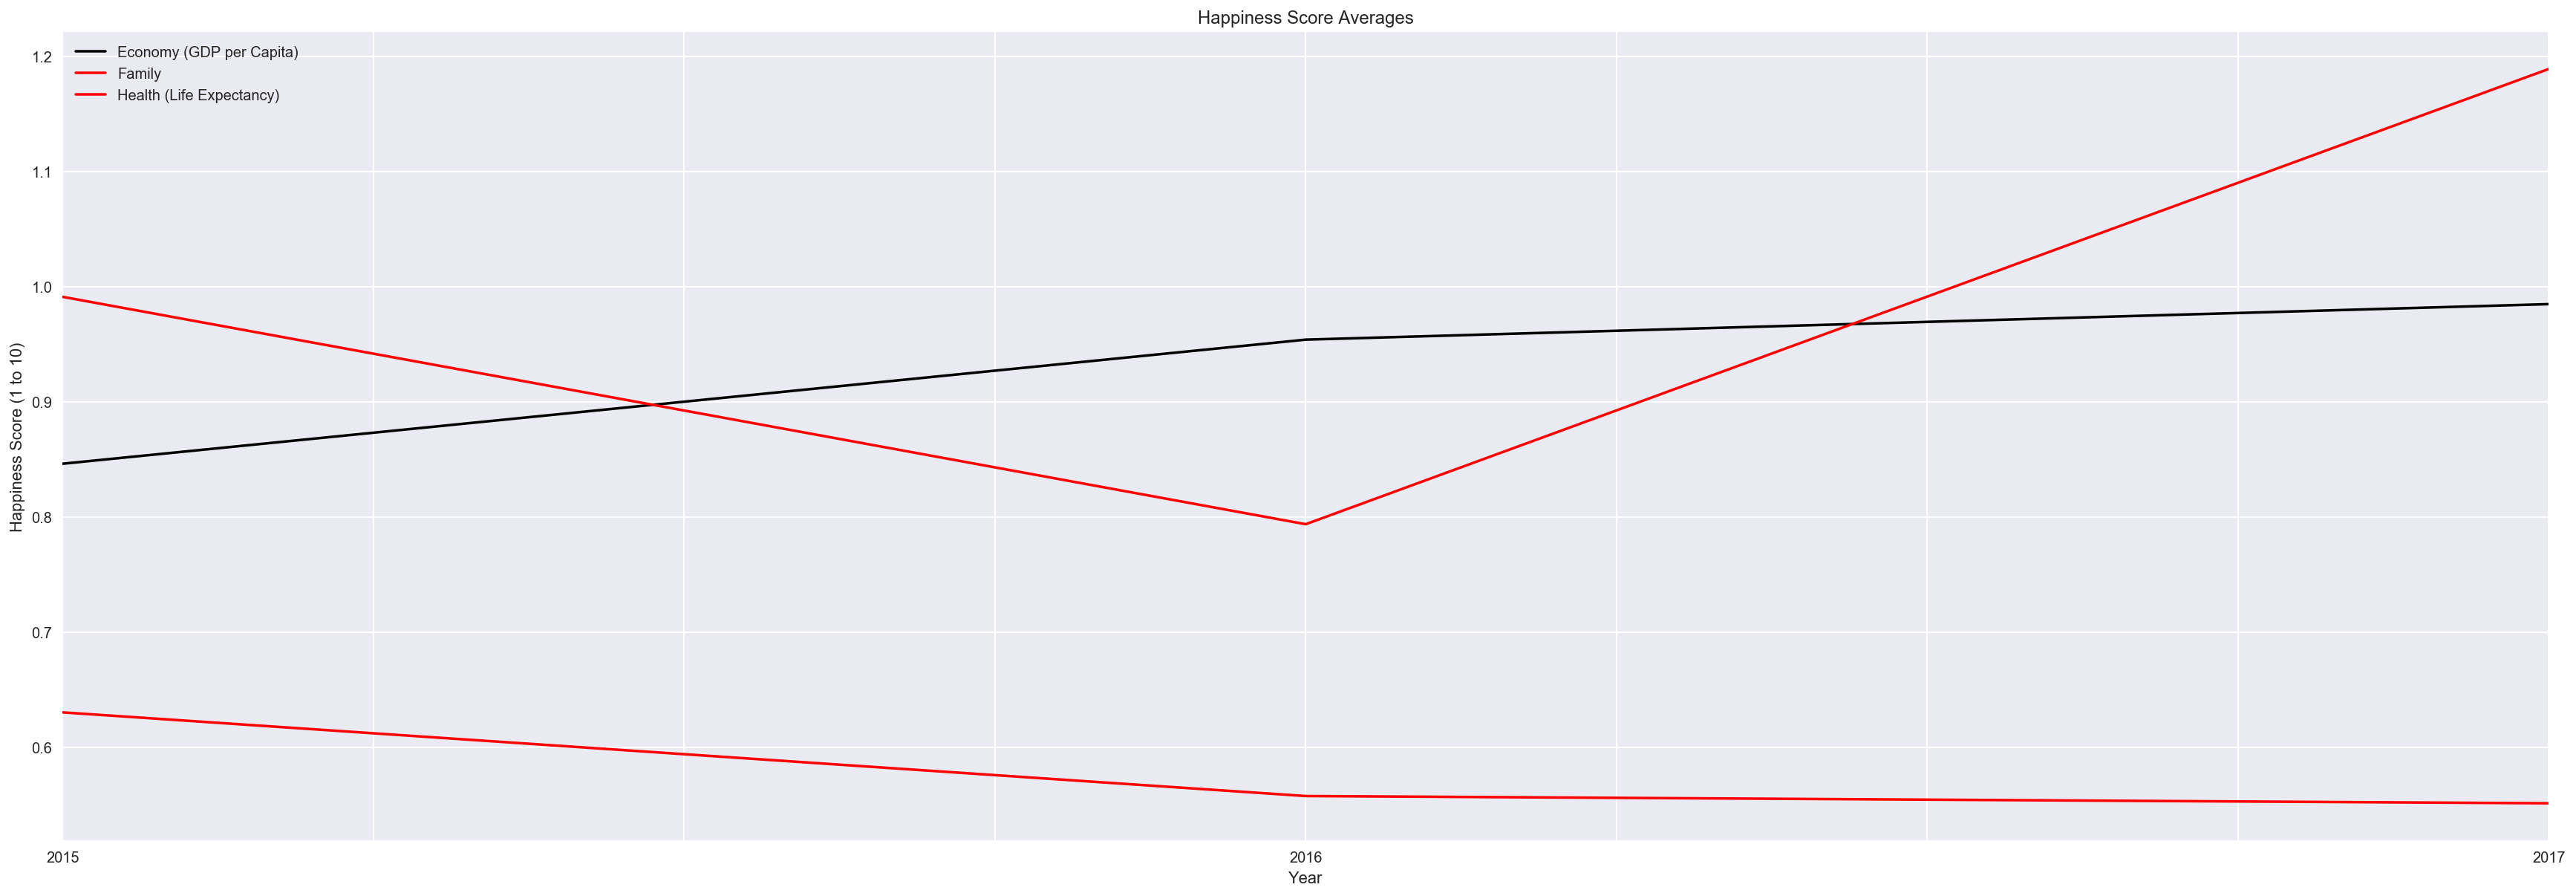

In [101]:
# Plotting Overall Happiness of Each Year
overview[:3].T.plot(color=['black','r','r'])
plt.title('Happiness Score Averages')
plt.ylabel('Happiness Score (1 to 10)') ; plt.xlabel('Year')


In [102]:
r17[['Happiness Score','Lower Confidence Interval']].mean()

Happiness Score              5.354019
Lower Confidence Interval    5.255713
dtype: float64

### Happiness Rankings by Region

In [103]:
# wrangling the avrage happiness score per geographcial region
region_happiness = pd.DataFrame()
for r, y in zip(reports, years):
    region_happiness_data = pd.DataFrame(r.groupby(['Region'])['Happiness Score'].mean())
    region_happiness_data.columns = [y + ' Happiness Score']
    region_happiness = pd.concat([region_happiness, region_happiness_data], axis=1)
    
# Adding an average happiness Score over the years, and sorting df by average
region_happiness['Average'] = region_happiness[['2015 Happiness Score','2016 Happiness Score',
                                                '2017 Happiness Score']].mean(axis=1)
region_happiness.sort_values(['Average'], ascending=False)

,2015 Happiness Score,2016 Happiness Score,2017 Happiness Score,Average
Region,,,,
Australia and New Zealand,7.285000,7.323500,7.299000,7.302500
North America,7.273000,7.254000,7.154500,7.227167
Western Europe,6.689619,6.685667,6.703714,6.693000
Latin America and Caribbean,6.144682,6.101750,5.957818,6.068083
Eastern Asia,5.626167,5.624167,5.646667,5.632333
Middle East and Northern Africa,5.406900,5.386053,5.369684,5.387546
Central and Eastern Europe,5.332931,5.370690,5.409931,5.371184
Southeastern Asia,5.317444,5.338889,5.444875,5.367069
Southern Asia,4.580857,4.563286,4.628429,4.590857


### Happiness Rankings by Country

In [104]:
# wrangling the avrage happiness score per country
country_happiness = pd.DataFrame()
for r, y in zip(reports, years):
    country_happiness_data = pd.DataFrame(r.groupby(['Country'])['Happiness Score'].mean())
    country_happiness_data.columns = [y + ' Happiness Score']
    country_happiness = pd.concat([country_happiness, country_happiness_data], axis=1)
    
# Adding an average happiness Score over the years, and sorting df by average
country_happiness['Average'] = country_happiness[['2015 Happiness Score','2016 Happiness Score',
                                                '2017 Happiness Score']].mean(axis=1)

# soritng the results by ascending order
country_happiness = country_happiness.sort_values(['Average'], ascending=False)

# view a smaple of the dataset
country_happiness.head(30)

,2015 Happiness Score,2016 Happiness Score,2017 Happiness Score,Average
Switzerland,7.587,7.509,7.494,7.530000
Denmark,7.527,7.526,7.522,7.525000
Iceland,7.561,7.501,7.504,7.522000
Norway,7.522,7.498,7.537,7.519000
Finland,7.406,7.413,7.469,7.429333
Canada,7.427,7.404,7.316,7.382333
Netherlands,7.378,7.339,7.377,7.364667
Sweden,7.364,7.291,7.284,7.313000
New Zealand,7.286,7.334,7.314,7.311333
Australia,7.284,7.313,7.284,7.293667


N/A values represent, no survey measurement record measured for that country in the reporting year.

### Survey Measure vs Happiness Score Correlation Matrix

In [105]:
# defining styling restrictions for correlation matrix
def color_schema(val):
    color = 'red' if val < 0 else 'black'
    color = 'green' if val > 0.75 else color
    return 'color: %s' % color



##### 2017 Correlation Matrix

In [106]:
# creating a list of she quantative feature within the cleaned data set
corr_feat = ['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year']

# viewing correlation matrix for the 2017 report
matrix = r17[corr_feat].corr().style.applymap(color_schema)
matrix


,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1,0.812469,0.752737,0.781951,0.570137,0.42908,0.155256,0.475355
Economy (GDP per Capita),0.812469,1,0.688296,0.843077,0.369873,0.350944,-0.0190113,0.0242264
Family,0.752737,0.688296,1,0.61208,0.424966,0.231841,0.0516926,0.0705058
Health (Life Expectancy),0.781951,0.843077,0.61208,1,0.349827,0.279752,0.0631915,0.0549633
Freedom,0.570137,0.369873,0.424966,0.349827,1,0.499183,0.316083,0.081926
Trust (Government Corruption),0.42908,0.350944,0.231841,0.279752,0.499183,1,0.294159,-0.0227551
Generosity,0.155256,-0.0190113,0.0516926,0.0631915,0.316083,0.294159,1,-0.116627
Dystopia Residual,0.475355,0.0242264,0.0705058,0.0549633,0.081926,-0.0227551,-0.116627,1


##### Weighted Correlation Matrix

In [127]:
# creating a list of report weights
weights  = []
for r in reports:
    weights.append(r.shape[0])
print(weights)
print('Total Observations:', np.sum(weights))

[158, 157, 155]
Total Observations: 470


In [126]:
weighted_matrix = (r15[corr_feat].corr()*158/470)+(r16[corr_feat].corr()*157/470)+(r15[corr_feat].corr()*155/470)
weighted_matrix = weighted_matrix.style.applymap(color_schema)
weighted_matrix

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1,0.784091,0.740153,0.737957,0.567749,0.397481,0.172478,0.534904
Economy (GDP per Capita),0.784091,1,0.653397,0.823356,0.367622,0.303309,-0.0154979,0.0496008
Family,0.740153,0.653397,1,0.550236,0.444421,0.208263,0.0882199,0.138615
Health (Life Expectancy),0.737957,0.823356,0.550236,1,0.354037,0.248752,0.0975296,0.04633
Freedom,0.567749,0.367622,0.444421,0.354037,1,0.496373,0.369853,0.0724197
Trust (Government Corruption),0.397481,0.303309,0.208263,0.248752,0.496373,1,0.28608,-0.0230181
Generosity,0.172478,-0.0154979,0.0882199,0.0975296,0.369853,0.28608,1,-0.11189
Dystopia Residual,0.534904,0.0496008,0.138615,0.04633,0.0724197,-0.0230181,-0.11189,1


Author: Kavi Sekhon